## Multiclass Classification Model

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_3_2.csv').to_numpy()

x = data[:, :-1]
y = data[:, -1]

print('x', x.shape)
print('y', y.shape)

x (300, 2)
y (300,)


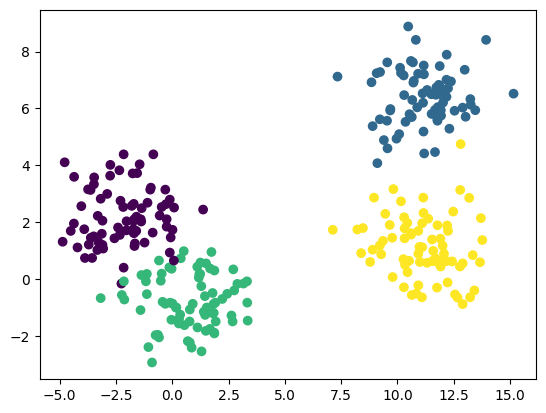

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

### Data Preparation
90% for training (seen data), 10% for testing (unseen data).

In [17]:
import torch

print('length of x: ', len(x))
train_data_index = int(len(x) * 0.9)
print('train_data_index: ', train_data_index)
tx = x[:train_data_index]
ty = y[:train_data_index]

train_x = torch.tensor(tx, dtype=torch.float32)
train_y = torch.tensor(ty, dtype=torch.float32)

validate_data_index = int(len(x) * 0.8)
vx = x[validate_data_index:train_data_index]
vy = y[validate_data_index:train_data_index]

validate_x = torch.tensor(vx, dtype=torch.float32)
validate_y = torch.tensor(vy, dtype=torch.float32)

tt_x = x[train_data_index:]
tt_y = y[train_data_index:]

test_x = torch.tensor(tt_x, dtype=torch.float32)
test_y = torch.tensor(tt_y, dtype=torch.float32)

# # Plotting the data
# def plot_data(train_x, train_y, test_x, test_y):
#     plt.figure(figsize=(10, 5))
    
#     # Plot training data
#     plt.bar(train_x.numpy(), train_y.numpy(), color='blue', label='Training Data')
    
#     # Plot testing data
#     plt.bar(test_x.numpy(), test_y.numpy(), color='red', label='Testing Data')
    
#     plt.xlabel('X values')
#     plt.ylabel('Y values')
#     plt.title('Training and Testing Data')
#     plt.legend()
#     plt.show()

# plot_data(train_x, train_y, test_x, test_y)

length of x:  300
train_data_index:  270


/var/folders/xh/z_xrqfjs0l36y0_mzh_wg3r40000gn/T/ipykernel_1613/2875436550.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(ty, dtype=torch.float32)
/var/folders/xh/z_xrqfjs0l36y0_mzh_wg3r40000gn/T/ipykernel_1613/2875436550.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  validate_y = torch.tensor(vy, dtype=torch.float32)
/var/folders/xh/z_xrqfjs0l36y0_mzh_wg3r40000gn/T/ipykernel_1613/2875436550.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_y = torch.tensor(tt_y, dtype=torch.float32)


### Create a model

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class MyModel(nn.Module):
  def __init__(self, numb_input):
    super().__init__()
    self.linear = nn.Linear(numb_input, 1)

  def forward(self, x):
    '''
    x : tensor(m, 2)
    y : tensor(m)
    '''
    out = self.linear(x) # tensor(m, 1)
    out = torch.sigmoid(out) # tensor(m, 1)
    return out.flatten() # tensor(m)

  def fit(self, x, y, numb_iter=500, lr=0.01):
    opt = optim.SGD(self.parameters(), lr=lr)
    for i in range(numb_iter):
      zip = self(x)
      J = -y*torch.log(zip) - (1 - y)*torch.log(1-zip)
      J = J.mean()

      if i % 20 == 0:
        print('iter: %d, J: %f' % (i, J.item()))

      J.backward()
      opt.step() # update gradient
      opt.zero_grad()  # reset gradient

  def evaluate(self, x, y):
    zip = self(x)
    zip = (zip > 0.5).float()
    return (zip == y).float().mean()


In [9]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

### Training Model

In [14]:
models = [MyModel(2), MyModel(2), MyModel(2), MyModel(2)]

for i, model in enumerate(models):
  new_y = ty.copy()
  id = new_y == i
  id_not = new_y != i
  new_y[id] = 1
  new_y[id_not] = 0
  y = torch.tensor(new_y, dtype=torch.float32)
  model.fit(train_x, y, numb_iter=2000)

iter: 0, J: 4.610431
iter: 20, J: 0.354957
iter: 40, J: 0.267792
iter: 60, J: 0.241487
iter: 80, J: 0.225600
iter: 100, J: 0.214045
iter: 120, J: 0.204924
iter: 140, J: 0.197388
iter: 160, J: 0.190978
iter: 180, J: 0.185411
iter: 200, J: 0.180501
iter: 220, J: 0.176119
iter: 240, J: 0.172169
iter: 260, J: 0.168579
iter: 280, J: 0.165294
iter: 300, J: 0.162270
iter: 320, J: 0.159472
iter: 340, J: 0.156872
iter: 360, J: 0.154445
iter: 380, J: 0.152173
iter: 400, J: 0.150037
iter: 420, J: 0.148025
iter: 440, J: 0.146124
iter: 460, J: 0.144324
iter: 480, J: 0.142614
iter: 500, J: 0.140988
iter: 520, J: 0.139439
iter: 540, J: 0.137959
iter: 560, J: 0.136544
iter: 580, J: 0.135189
iter: 600, J: 0.133889
iter: 620, J: 0.132640
iter: 640, J: 0.131439
iter: 660, J: 0.130283
iter: 680, J: 0.129168
iter: 700, J: 0.128092
iter: 720, J: 0.127053
iter: 740, J: 0.126048
iter: 760, J: 0.125075
iter: 780, J: 0.124133
iter: 800, J: 0.123220
iter: 820, J: 0.122334
iter: 840, J: 0.121473
iter: 860, J: 0.1

### Evaluating the models

In [15]:
for i, model in enumerate(models):
  accuracy = model.evaluate(validate_x, validate_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy.item()))

Model 1, accuracy rate: 0.0000
Model 2, accuracy rate: 0.4000
Model 3, accuracy rate: 0.2000
Model 4, accuracy rate: 0.2000


### Test the models

In [ ]:
for i, model in enumerate(models):
  accuracy = model.evaluate(test_x, test_y)
  print('Model %d, accuracy rate: %.4f' % (i+1, accuracy.item()))